<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/hdfc_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’

# New Section

In [1]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

ERROR: ignored

In [ ]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [ ]:
# Download data from Yahoo Finance
symbol<-getSymbols("HDFC.NS",from=start_date,auto.assign=FALSE)



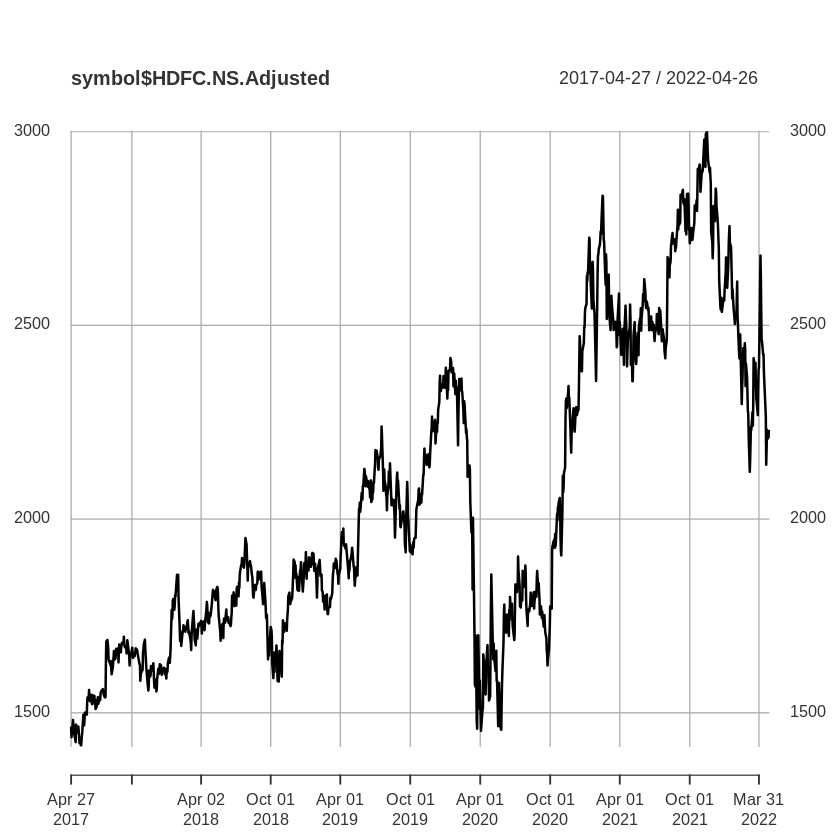

In [ ]:
plot(symbol$HDFC.NS.Adjusted)

In [ ]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$HDFC.NS.Volume>0,]

     Index             HDFC.NS.Open   HDFC.NS.High   HDFC.NS.Low  
 Min.   :2017-04-27   Min.   :1476   Min.   :1530   Min.   :1473  
 1st Qu.:2018-07-21   1st Qu.:1800   1st Qu.:1823   1st Qu.:1776  
 Median :2019-10-31   Median :1982   Median :1998   Median :1961  
 Mean   :2019-10-26   Mean   :2102   Mean   :2125   Mean   :2076  
 3rd Qu.:2021-01-23   3rd Qu.:2424   3rd Qu.:2448   3rd Qu.:2402  
 Max.   :2022-04-26   Max.   :3004   Max.   :3021   Max.   :2971  
 HDFC.NS.Close  HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   :1500   Min.   :  119832   Min.   :1413    
 1st Qu.:1798   1st Qu.: 2239477   1st Qu.:1722    
 Median :1979   Median : 3170249   Median :1898    
 Mean   :2100   Mean   : 3716793   Mean   :2041    
 3rd Qu.:2424   3rd Qu.: 4359992   3rd Qu.:2382    
 Max.   :3001   Max.   :34117717   Max.   :3001    

In [ ]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$HDFC.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"hdfc_returns.csv",row.names=FALSE)

           HDFC.NS.Adjusted
2017-04-28     -0.018913642
2017-05-02      0.030496588
2017-05-03     -0.008523398
2017-05-04     -0.004432903
2017-05-05     -0.011249734
2017-05-08     -0.011279724

In [ ]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)



Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 101.8756
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 02:29:52 2022 by user: 


In [ ]:
jarqueberaTest(prices$HDFC.NS.Adjusted)

In [ ]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for HDFC
jarqueberaTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2711.2004
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 02:29:56 2022 by user: 


In [ ]:
# Now we do other tests for same data for cross check
shapiroTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9296
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 02:30:01 2022 by user: 


In [ ]:
shapiroTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9142
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 02:30:06 2022 by user: 


In [ ]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$HDFC.NS.Adjusted) #  p-value = 0.41, not stationary


	Augmented Dickey-Fuller Test

data:  prices$HDFC.NS.Adjusted
Dickey-Fuller = -2.3878, Lag order = 10, p-value = 0.4141
alternative hypothesis: stationary


In [ ]:
adf.test(returns$HDFC.NS.Adjusted) 

Warning message in adf.test(returns$HDFC.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$HDFC.NS.Adjusted
Dickey-Fuller = -11.601, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
summary(ur.kpss(prices$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.6414 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [ ]:
summary(ur.kpss(returns$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0622 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


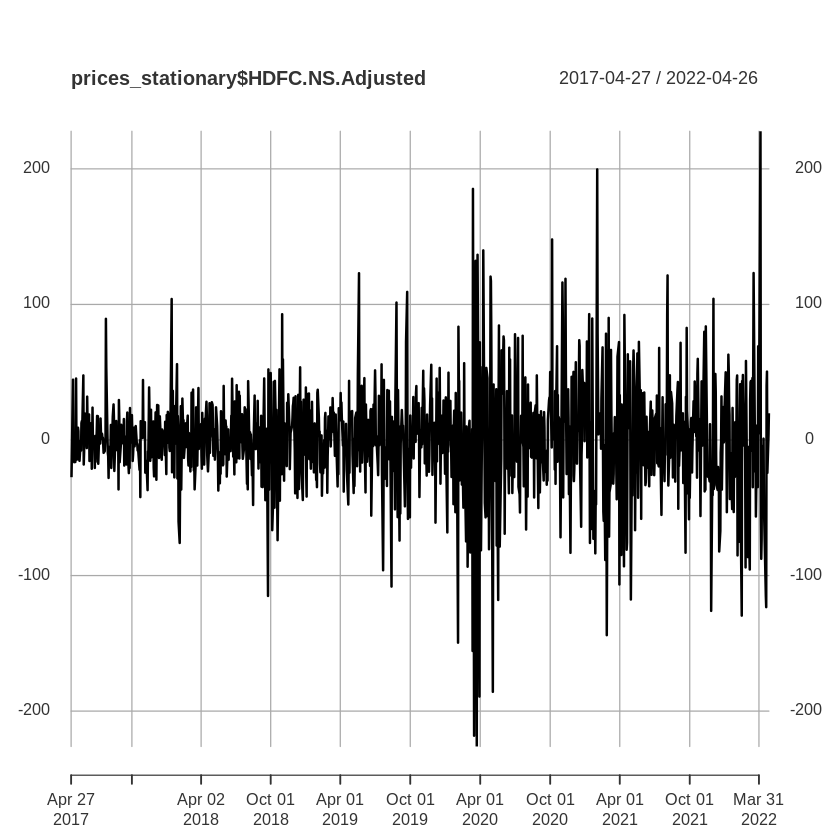

In [ ]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$HDFC.NS.Adjusted)

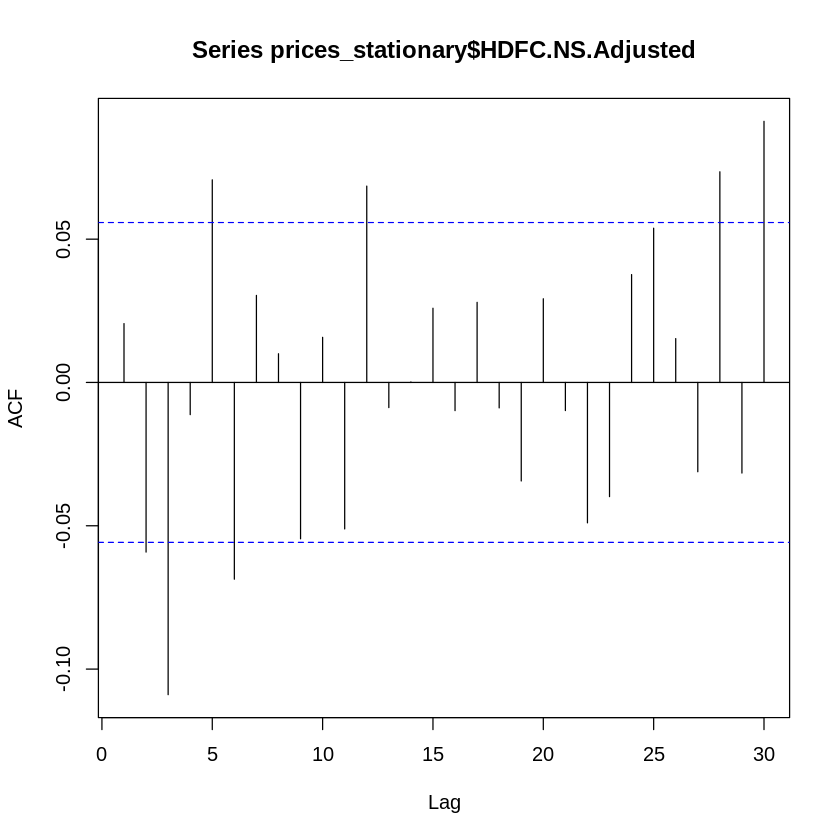

In [ ]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$HDFC.NS.Adjusted)

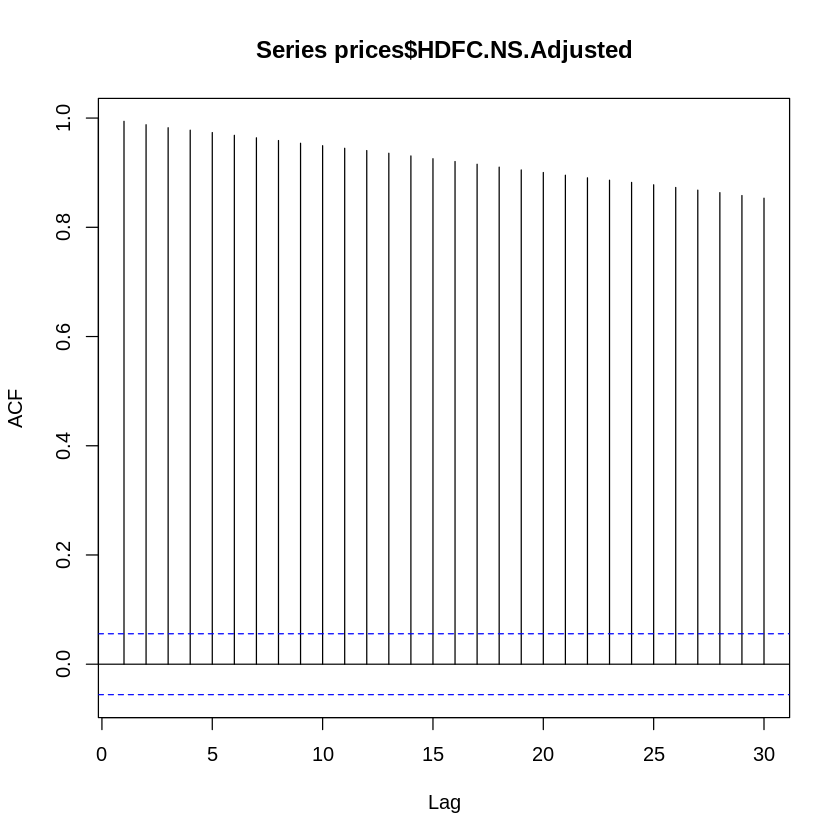

In [ ]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$HDFC.NS.Adjusted)

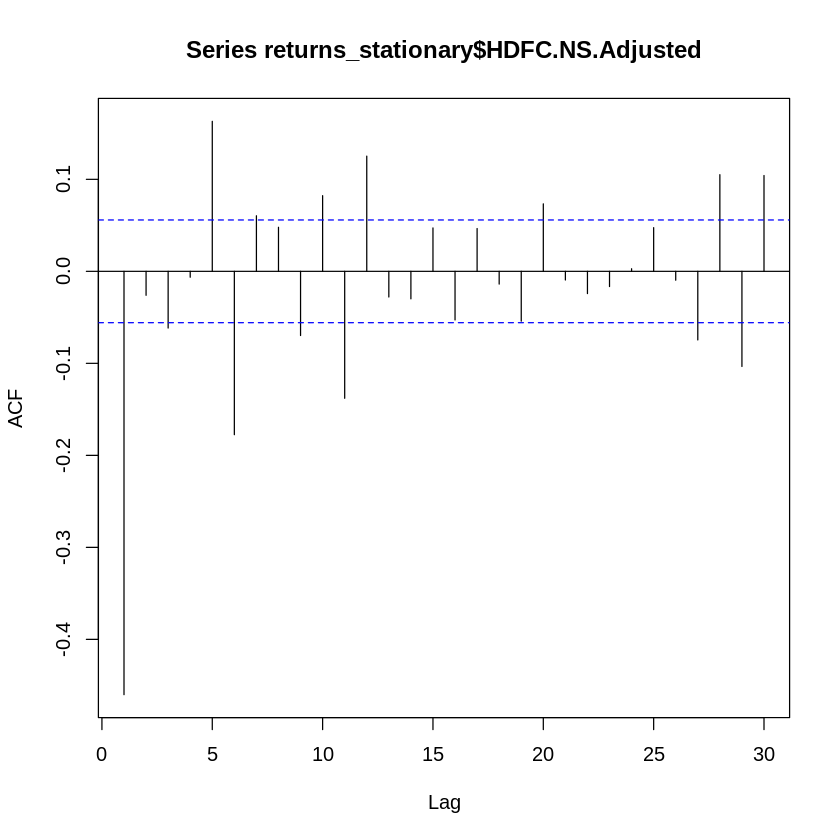

In [ ]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$HDFC.NS.Adjusted)

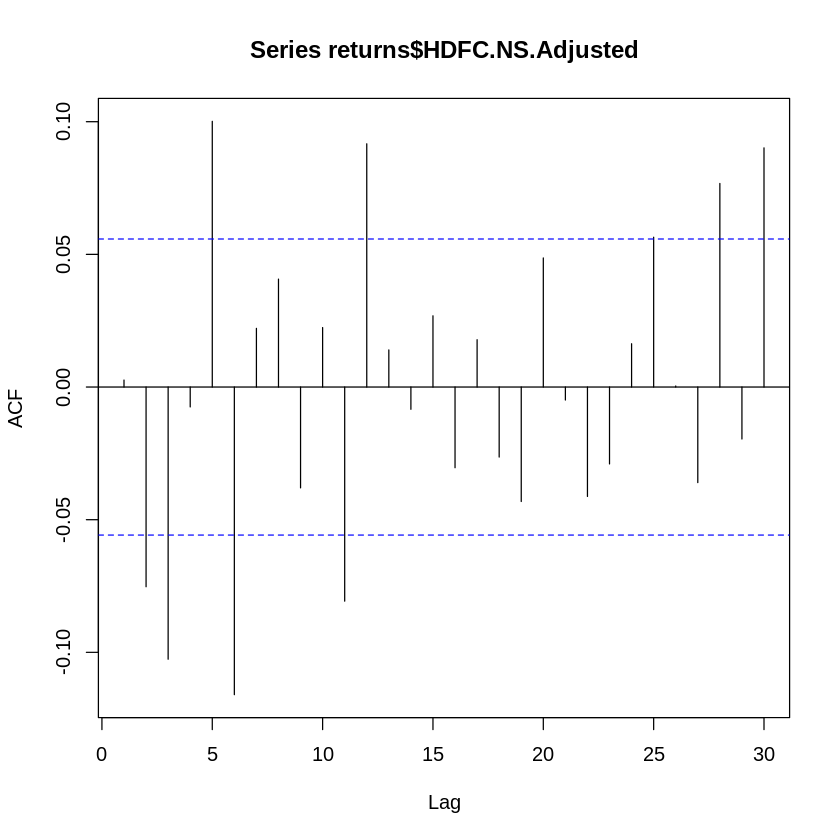

In [ ]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$HDFC.NS.Adjusted)

In [ ]:
# tests for auto-corelation
Box.test(prices_stationary$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$HDFC.NS.Adjusted
X-squared = 25.915, df = 5, p-value = 9.267e-05


In [ ]:
# for returns
Box.test(returns_stationary$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$HDFC.NS.Adjusted
X-squared = 300.21, df = 5, p-value < 2.2e-16


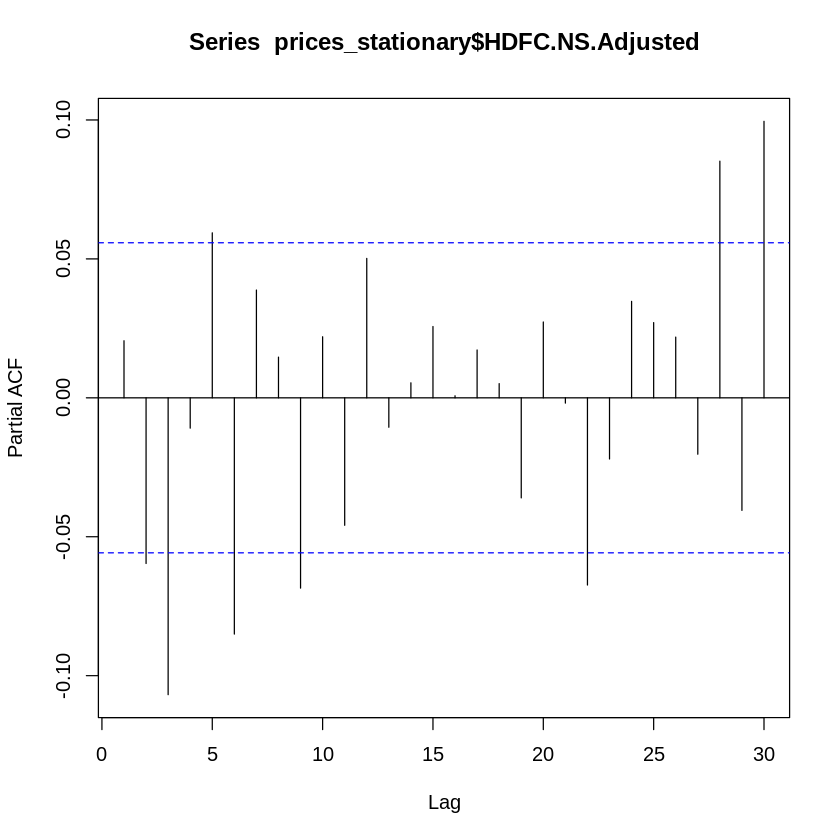

In [ ]:
#PACF
pacf(prices_stationary$HDFC.NS.Adjusted)

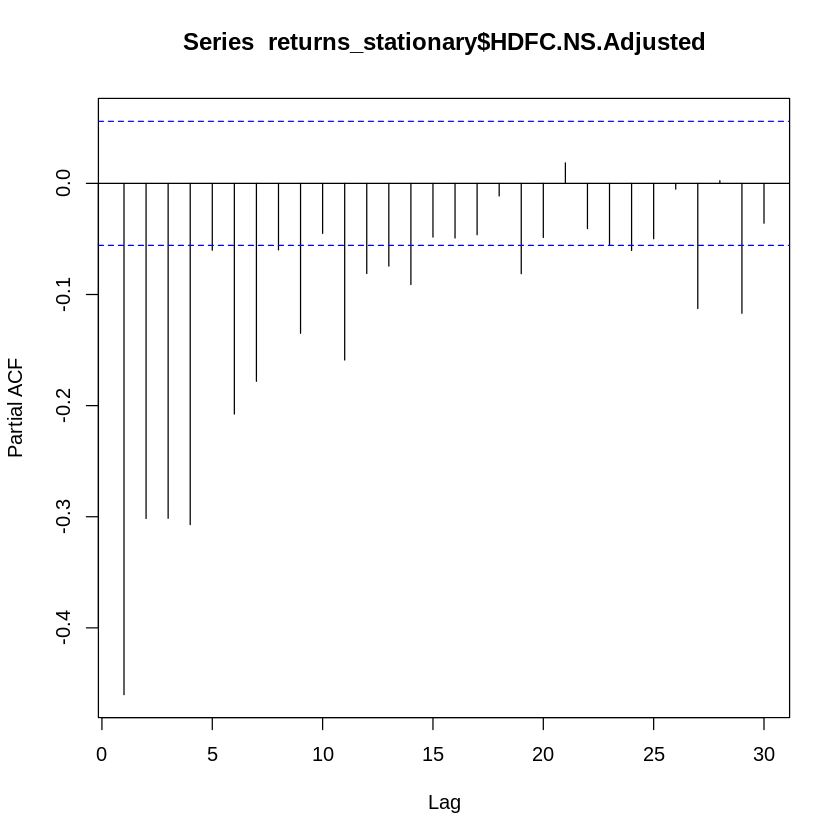

In [ ]:
pacf(returns_stationary$HDFC.NS.Adjusted)

In [ ]:
basicStats(prices)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.235000e+03
NAs,0.000000e+00
Minimum,1.413075e+03
Maximum,3.000850e+03
1. Quartile,1.721923e+03
3. Quartile,2.382077e+03
Mean,2.041262e+03
Median,1.897942e+03
Sum,2.520959e+06


In [ ]:
BoxCox.lambda(prices$HDFC.NS.Adjusted)

[1] 0.7813954

In [ ]:
# To make our data appear normal
prices_normal<-prices
prices_normal$HDFC.NS.Adjusted<-forecast::BoxCox(prices$HDFC.NS.Adjusted, lambda = 0.781395366395601)
basicStats(prices_normal)

,HDFC.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,369.105391
Maximum,665.882932
1. Quartile,430.970612
3. Quartile,555.735056
Mean,490.886685
Median,465.126340
Sum,606245.056328


In [ ]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$HDFC.NS.Adjusted)


[1] 1.999924

In [ ]:
returns_normal$HDFC.NS.Adjusted<-forecast::BoxCox(returns$HDFC.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,HDFC.NS.Adjusted
,<dbl>
nobs,1234.000000
NAs,0.000000
Minimum,-0.510202
Maximum,-0.495312
1. Quartile,-0.500066
3. Quartile,-0.499968
Mean,-0.500022
Median,-0.500019
Sum,-617.027153


In [ ]:
model<-auto.arima(prices$HDFC.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(5,1,2)   


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12571.83
 ARIMA(0,1,0) with drift         : 12577.58
 ARIMA(1,1,0) with drift         : 12579.57
 ARIMA(0,1,1) with drift         : 12579
 ARIMA(0,1,0)                    : 12575.88
 ARIMA(1,1,2) with drift         : 12573.29
 ARIMA(2,1,1) with drift         : 12572.62
 ARIMA(3,1,2) with drift         : 12565.69
 ARIMA(3,1,1) with drift         : 12567.53
 ARIMA(4,1,2) with drift         : 12550.27
 ARIMA(4,1,1) with drift         : 12566.19
 ARIMA(5,1,2) with drift         : 12543.4
 ARIMA(5,1,1) with drift         : 12563.34
 ARIMA(6,1,2) with drift         : 12557.51
 ARIMA(5,1,3) with drift         : 12544.8
 ARIMA(4,1,3) with drift         : 12562.8
 ARIMA(6,1,1) with drift         : 12561.81
 ARIMA(6,1,3) with drift         : 12549.82
 ARIMA(5,1,2)                    : 12541.53
 ARIMA(4,1,2)                    : 12548.39
 ARIMA(5,1,1)                    : 12561.7
 ARIMA(6,1,2)         

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1236       2233.358 2183.530 2283.186 2157.153 2309.564
1237       2224.015 2152.298 2295.733 2114.333 2333.697
1238       2231.853 2145.148 2318.558 2099.249 2364.457
1239       2224.329 2127.751 2320.907 2076.626 2372.032
1240       2227.254 2121.541 2332.967 2065.580 2388.928
1241       2230.686 2115.835 2345.536 2055.037 2406.335
1242       2223.182 2100.444 2345.920 2035.470 2410.894
1243       2231.322 2100.505 2362.138 2031.255 2431.388
1244       2226.036 2088.033 2364.039 2014.979 2437.093
1245       2226.233 2081.450 2371.015 2004.807 2447.658


	Ljung-Box test

data:  Residuals from ARIMA(5,1,2)
Q* = 4.7832, df = 3, p-value = 0.1884

Model df: 7.   Total lags used: 10



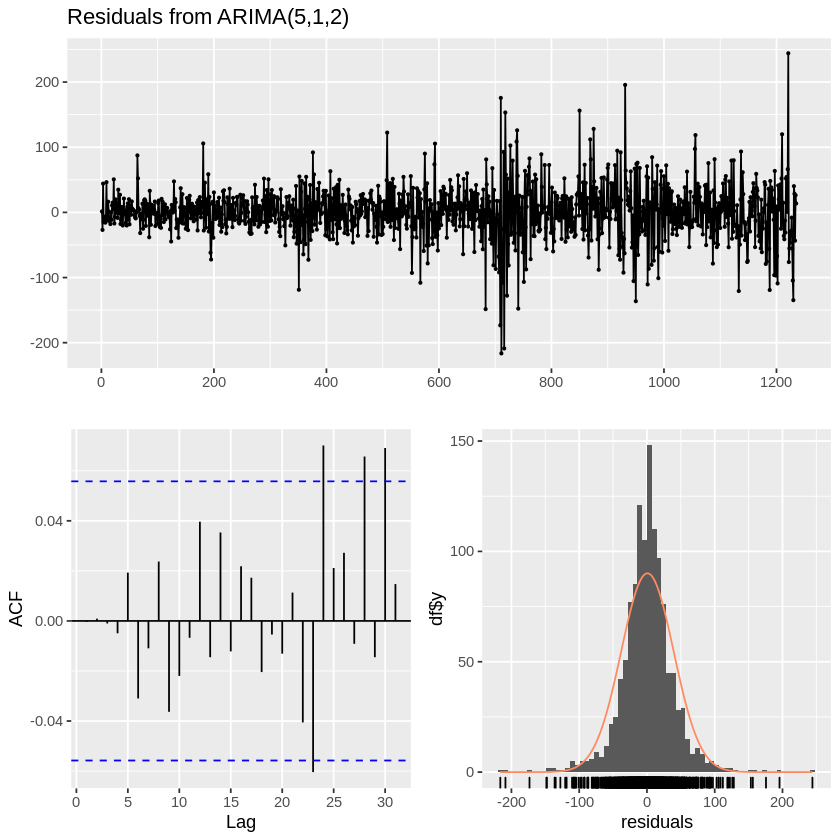

In [ ]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [ ]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6969239,38.75491,27.05608,0.01775308,1.333908,0.9881534,-0.0003877682


[1] 1235

[1] 44.79399

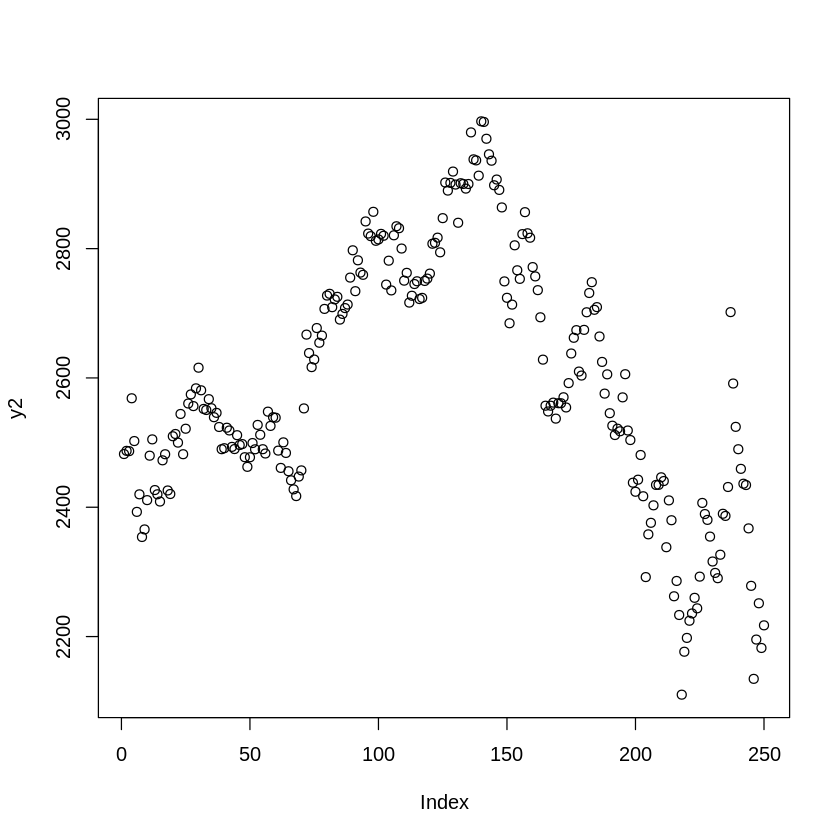

In [ ]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 2201 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$HDFC.NS.Adjusted,250)) 


[1] 1234

[1] 0.01790388

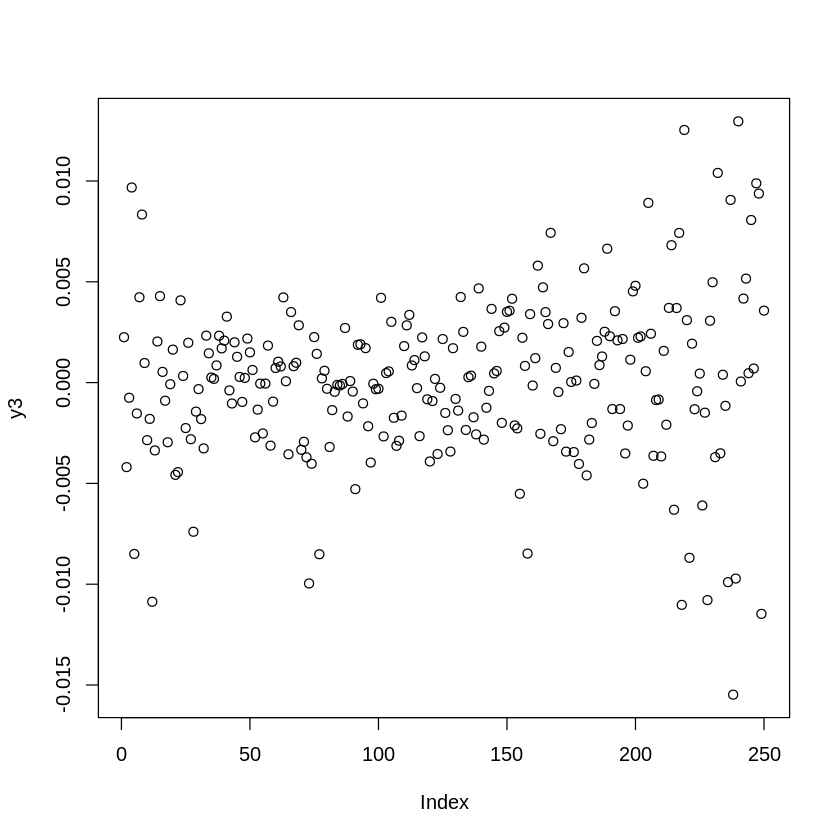

In [ ]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$HDFC.NS.Adjusted,250)) 